In [1]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from os.path import join

import random
import tensorflow as tf
from tensorflow import keras

/Users/suminbae/opt/anaconda3/envs/newEnv/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/suminbae/opt/anaconda3/envs/newEnv/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/suminbae/opt/anaconda3/envs/newEnv/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/suminbae/opt/anaco

# tensorflow version 1.14

In [2]:
tf.__version__

'1.14.0'

In [3]:
datax = np.load(join("mnist_data",'MNIST.npy'))
datay = np.load(join("mnist_data",'Label.npy'))

In [4]:
datax.shape , datay.shape

((60000, 28, 28), (60000,))

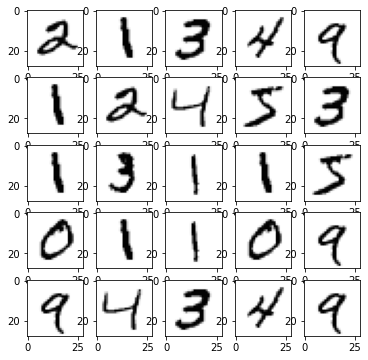

In [5]:
fig,ax = plt.subplots(5,5,figsize=(6,6))

random

for i in range(5):
    for j in range(5):
        n = random.randint(0,10)
        ax[i][j].imshow(datax[n],cmap='Greys')
        




#  normalize datax

In [6]:
x_data = datax/255

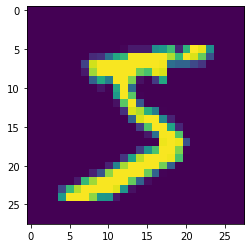

In [7]:
plt.imshow(x_data[0])

# reshaping image into vetor

In [8]:
x_data = x_data.reshape(-1,datax.shape[1]*datax.shape[1])

In [9]:
x_data.shape

(60000, 784)

# one-hot encoding

In [10]:
from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer()

y_data = encoder.fit_transform(datay)

In [11]:
datay

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [12]:
y_data.shape

(60000, 10)

In [13]:
np.argmax(y_data,axis=1)

array([5, 0, 4, ..., 5, 6, 8])

# Requirement1 train_test 분리 

In [14]:
X_train,X_test,y_train,y_test = train_test_split(x_data,y_data,test_size=0.2)

In [15]:
X_train.shape,X_test.shape

((48000, 784), (12000, 784))

In [16]:
y_train.shape

(48000, 10)

# Req2. first model : Keras Sequential 

In [42]:
model = keras.Sequential([])

input_shape = (X_train.shape[1],)

model.add(keras.layers.Dense(512,activation='relu',input_shape=input_shape))
model.add(keras.layers.Dropout(0.25))
model.add(keras.layers.Dense(256,activation='relu'))
model.add(keras.layers.Dropout(0.25))
model.add(keras.layers.Dense(y_train.shape[1],activation='softmax'))




In [43]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_5 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_6 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)                2570      
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
_________________________________________________________________


In [44]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [45]:
history = model.fit(X_train,y_train , epochs=5)

Epoch 1/5
48000/48000 [==============================] - 11s 238us/sample - loss: 0.2578 - acc: 0.9210
Epoch 2/5
48000/48000 [==============================] - 11s 230us/sample - loss: 0.1225 - acc: 0.9630
Epoch 3/5
48000/48000 [==============================] - 11s 232us/sample - loss: 0.0922 - acc: 0.9722
Epoch 4/5
48000/48000 [==============================] - 11s 233us/sample - loss: 0.0775 - acc: 0.9765
Epoch 5/5
48000/48000 [==============================] - 12s 241us/sample - loss: 0.0668 - acc: 0.9790


In [54]:
#saving model
#model.save("first_model.h5")

In [55]:
#load the model
#model = tf.keras.models.load_model("first_model.h5")


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [56]:
loss_per_epoch = history.history['loss']
acc_per_epoch = history.history['acc']
plt.plot(loss_per_epoch)
plt.plot(acc_per_epoch)
plt.xlabel("# of epochs")
plt.legend(['loss','acc'])
plt.xticks(np.arange(0,5))

([<matplotlib.axis.XTick at 0x7f9c38546b10>,
 <a list of 5 Text major ticklabel objects>)

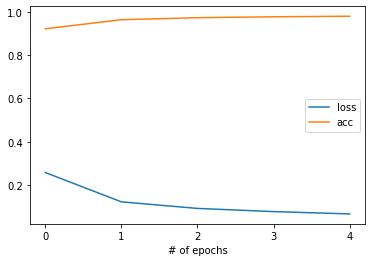

In [59]:
plt.plot(loss_per_epoch)
plt.plot(acc_per_epoch)
plt.xlabel("# of epochs")
plt.legend(['loss','acc'])
plt.xticks(np.arange(0,5))


# test acc for first model  test_score  about 97%

In [60]:
model.evaluate(X_test,y_test)

12000/12000 [==============================] - 1s 49us/sample - loss: 0.0810 - acc: 0.9768


[0.08103079665390153, 0.97675]

# Second model using scikit learn

In [17]:
from sklearn.neural_network import MLPClassifier

In [18]:
mlp = MLPClassifier(solver='adam', hidden_layer_sizes=(512,256,128),activation='relu')

In [19]:
mlp.fit(X_train,y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(512, 256, 128), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

# train score에 대해서는 99%

In [20]:
mlp.score(X_train,y_train)

0.9957083333333333

# test score에 대해서는 97% 

In [21]:
mlp.score(X_test,y_test)

0.9705

# Third Model using batch norm

In [26]:
# model = keras.Sequential([])

# input_shape = (X_train.shape[1],)

# model.add(keras.layers.Dense(512,activation='relu',input_shape=input_shape))
# model.add(keras.layers.Dropout(0.25))
# model.add(keras.layers.Dense(256,activation='relu'))
# model.add(keras.layers.Dropout(0.25))
# model.add(keras.layers.Dense(y_train.shape[1],activation='softmax'))



# model = Sequential
# model.add(Dense(32))
# model.add(BatchNormalization())
# model.add(Activation('relu'))



model_3 = keras.Sequential([])
input_shape = (X_train.shape[1],)

model_3.add(keras.layers.Dense(512 , input_shape=input_shape))
model_3.add(keras.layers.BatchNormalization())
model_3.add(keras.layers.Activation("relu"))
model_3.add(keras.layers.Dense(256))
model_3.add(keras.layers.BatchNormalization())
model_3.add(keras.layers.Activation("relu"))
model_3.add(keras.layers.Dense(128))
model_3.add(keras.layers.BatchNormalization())
model_3.add(keras.layers.Activation("relu"))
model_3.add(keras.layers.Dense(10))
model_3.add(keras.layers.Activation("softmax"))





In [28]:
model_3.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 512)               401920    
_________________________________________________________________
batch_normalization_5 (Batch (None, 512)               2048      
_________________________________________________________________
activation_5 (Activation)    (None, 512)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 256)               131328    
_________________________________________________________________
batch_normalization_6 (Batch (None, 256)               1024      
_________________________________________________________________
activation_6 (Activation)    (None, 256)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)              

In [29]:
model_3.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [30]:
history = model_3.fit(X_train,y_train, epochs=10)

Epoch 1/10
48000/48000 [==============================] - 14s 299us/sample - loss: 0.2177 - acc: 0.9351
Epoch 2/10
48000/48000 [==============================] - 14s 282us/sample - loss: 0.1077 - acc: 0.9665
Epoch 3/10
48000/48000 [==============================] - 13s 272us/sample - loss: 0.0848 - acc: 0.9729
Epoch 4/10
48000/48000 [==============================] - 13s 278us/sample - loss: 0.0637 - acc: 0.9796
Epoch 5/10
48000/48000 [==============================] - 13s 271us/sample - loss: 0.0529 - acc: 0.9824
Epoch 6/10
48000/48000 [==============================] - 13s 277us/sample - loss: 0.0475 - acc: 0.9848
Epoch 7/10
48000/48000 [==============================] - 15s 304us/sample - loss: 0.0386 - acc: 0.9870
Epoch 8/10
48000/48000 [==============================] - 13s 274us/sample - loss: 0.0350 - acc: 0.9880
Epoch 9/10
48000/48000 [==============================] - 13s 277us/sample - loss: 0.0324 - acc: 0.9896
Epoch 10/10
48000/48000 [==============================] - 13s 2

([<matplotlib.axis.XTick at 0x7ff9857dd8d0>,
 <a list of 10 Text major ticklabel objects>)

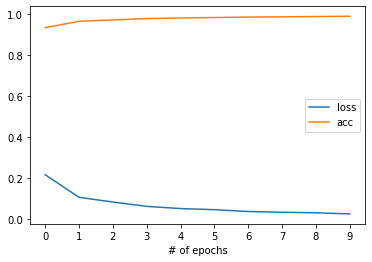

In [31]:
loss_per_epoch = history.history['loss']
acc_per_epoch = history.history['acc']
plt.plot(loss_per_epoch)
plt.plot(acc_per_epoch)
plt.xlabel("# of epochs")
plt.legend(['loss','acc'])
plt.xticks(np.arange(0,10))

In [32]:
model_3.evaluate(X_test,y_test)

12000/12000 [==============================] - 1s 70us/sample - loss: 0.0752 - acc: 0.9801


[0.07516404210496694, 0.98008335]